In [ ]:
!pip install pandasql
import pandas
import pandasql
from pandasql import sqldf
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)
!ls "/content/drive/My Drive"
data_frame = pandas.read_csv('/content/drive/MyDrive/supermarket_sales.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=8a0dc33520e2768bff209e0331684e4d6ebd56f7cf1802660b6bab71637b5255
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Mounted at /content/drive
'2022.05.24 Danh sách CTV GT cụm Bill Gates - Hoàng Mai.xlsx'
'Bai 1_Khai thac CSDL.xlsx'
'Colab Notebooks'
 InforeTech_EntryTest
'IOT - 132667 - 20212'
'Ngoc Lan Vu - CV Data Analyst Intern (1).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern (2).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern (3).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern.pdf'
 practice_supermarket.ipynb
'Project III - Vũ Thị Ngọc Lan - 20183939'
'Secret Confession.gform'
'Slide Capstone Project - TKXDPM - 20211-converted.pptx'
'Slide Capstone Project - TKXDPM - 20211.zip'
 supermarket_sales.csv
 us_youtube_trending

In [ ]:
q1 = "SELECT DISTINCT product_line FROM data_frame"
print(sqldf(q1))
#output of a sqldf() is a data frame

             product_line
0       Health and beauty
1  Electronic accessories
2      Home and lifestyle
3       Sports and travel
4      Food and beverages
5     Fashion accessories


công ty kinh doanh 6 dòng sản phẩm:

0       Health and beauty

1  Electronic accessories

2      Home and lifestyle

3       Sports and travel

4      Food and beverages

5     Fashion accessories

In [ ]:
import numpy
product_line_list = sqldf(q1).values.tolist() #output is a 2 dimension list
product_line_list = numpy.ravel(product_line_list) #convert 2 dimensional list to 1 dimensional list (Ref: https://thispointer.com/python-convert-matrix-2d-numpy-array-to-a-1d-numpy-array/)
print(product_line_list)
for x in product_line_list:
  print(x)
  q2 = "SELECT DISTINCT brand FROM data_frame WHERE product_line = '{0}'".format(x)
  print(sqldf(q2))

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Health and beauty
  brand
0     A
1     B
2     C
Electronic accessories
  brand
0     C
1     A
2     B
Home and lifestyle
  brand
0     A
1     C
2     B
Sports and travel
  brand
0     A
1     B
2     C
Food and beverages
  brand
0     B
1     A
2     C
Fashion accessories
  brand
0     B
1     A
2     C


Mỗi dòng sản phẩm được cung cấp bởi 3 brand:
1. A
2. B
3. C


In [ ]:
brand_list = sqldf("SELECT DISTINCT brand FROM data_frame;").values.tolist()
brand_list = numpy.ravel(brand_list)
print(brand_list)
for x in brand_list:
  print(x)
  q3 = "SELECT DISTINCT city FROM data_frame WHERE brand = '{0}';".format(x)
  print(sqldf(q3))

['A' 'C' 'B']
A
     city
0  Yangon
C
        city
0  Naypyitaw
B
       city
0  Mandalay


Brand A có trụ sở ở TP Yangon

Brand B có trụ sở ở TP Naypyitaw

Brand C có trụ sở ở TP Mandalay

In [ ]:
q4 = "SELECT DISTINCT customer_type FROM data_frame;"
print(sqldf(q4))

  customer_type
0        Member
1        Normal


Công ty có 2 loại khách hàng: 

1. Khách hàng thành viên (Member)
2. Khách hàng thông thường (Normal)

In [ ]:
q5 = "SELECT DISTINCT payment FROM data_frame;"
print(sqldf(q5))

       payment
0      Ewallet
1         Cash
2  Credit card


Công ty cung cấp 3 hình thức thanh toán chính:

1. Ewallet
2. Cash
3. Credit card

In [ ]:
data_frame['date'] = pandas.to_datetime(data_frame['date']).dt.date
q6 = "SELECT date FROM data_frame ORDER BY date LIMIT(1);"
q7 = "SELECT date FROM data_frame ORDER BY date DESC LIMIT(1);"
print(sqldf(q6))
print(sqldf(q7))

         date
0  2019-01-01
         date
0  2019-03-30


	Bảng thống kê doanh số bán hàng supermarker_sales.csv thống kê doanh số bán hàng của công ty trong khoảng thời gian từ 01/01/2019 -> 30/03/2019

In [ ]:
q8 = "SELECT SUM(profit) FROM data_frame"
print(sqldf(q8))
#gross_margin_profit: tỉ suất sinh lời

   SUM(profit)
0    15379.369


Tổng lợi nhuận của công ty trong 3 tháng (1/1/2019 – 30/3/2019): 15379.369

In [ ]:
product_profit = []
for x in product_line_list:
  print(x)
  q9 = "SELECT SUM(profit) FROM data_frame WHERE product_line = '{0}';".format(x)
  product_profit += sqldf(q9).values.tolist()
  print(sqldf(q9))

product_profit = numpy.ravel(product_profit)
print(product_profit)

Health and beauty
   SUM(profit)
0     2342.559
Electronic accessories
   SUM(profit)
0    2587.5015
Home and lifestyle
   SUM(profit)
0     2564.853
Sports and travel
   SUM(profit)
0    2624.8965
Food and beverages
   SUM(profit)
0     2673.564
Fashion accessories
   SUM(profit)
0     2585.995
[2342.559  2587.5015 2564.853  2624.8965 2673.564  2585.995 ]


Lợi nhuận của công ty theo từng ngành hàng:
1. Health and beauty: 2342.559
2. Electronic accessories: 2587.5015
3. Sports and travel: 2624.8965
4. Home and lifestyle: 2564.853
5. Food and beverages: 2673.564
6. Fashion accessories: 2585.995

=> Có thể thấy tổng lợi nhuận của các ngành hàng khá đồng đều, không có sự chênh lệch quá lớn



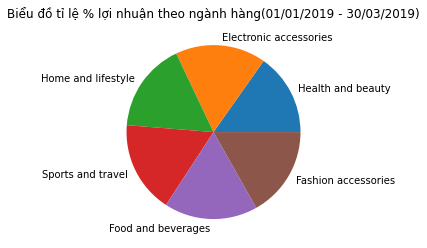

In [ ]:
import matplotlib.pyplot as plt
product_line_listed = product_line_list.tolist()
y = numpy.array([35, 25, 25, 15])
plt.pie(product_profit, labels = product_line_listed)
plt.title('Biểu đồ tỉ lệ % lợi nhuận theo ngành hàng(01/01/2019 - 30/03/2019)')
plt.show() 


In [ ]:
customer_profit = [sqldf("SELECT SUM(profit) FROM data_frame WHERE customer_type = 'Member';").values.tolist(), sqldf("SELECT SUM(profit) FROM data_frame WHERE customer_type = 'Normal';").values.tolist()]
customer_profit = numpy.ravel(customer_profit)


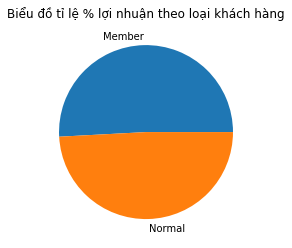

In [ ]:
plt.pie(customer_profit, labels = ['Member', 'Normal'])
plt.title('Biểu đồ tỉ lệ % lợi nhuận theo loại khách hàng')
plt.show()

Doanh thu của doanh nghiệp chiếm hơn 50% là khách hàng thành viên, cần thay đổi để tiếp cận được nhiều khách hàng mới hơn nữa

=> nâng cao chất lượng CSKH để giữ khách hàng thành viên
=> tìm kiếm thêm khách mới vì nếu là công ty mới thì khi mất khách hàng thân thiết sẽ khó có khả năng kiếm khách mới => ko phụ thuộc quá nhiều vào khách hàng thân thiết

In [ ]:
q10 = "SELECT SUM(profit), COUNT(invoice_id) FROM data_frame WHERE gender = 'Male';"
print(sqldf(q10))
q11 = "SELECT SUM(profit), COUNT(invoice_id) FROM data_frame WHERE gender = 'Female';"
print(sqldf(q11))

   SUM(profit)  COUNT(invoice_id)
0     7384.944                499
   SUM(profit)  COUNT(invoice_id)
0     7994.425                501


Lợi nhuận và số lượng đơn hàng thu được từ khách hàng nữ nhỉnh hơn khách hàng nam, tuy nhiên không có sự chênh lệch lớn

   Health and beauty  Electronic accessories  Home and lifestyle  \
0          1458.7025                883.8565           1296.9290   
1          1264.1955               1360.7010           1093.9965   

   Sports and travel  Food and beverages  Fashion accessories  gender  
0          1290.5725           1134.5255            1430.3275    Male  
1          1579.5675           1136.5950            1449.4000  Female  


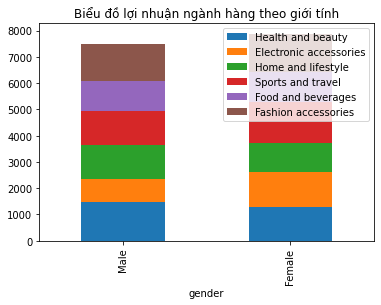

In [ ]:
gender  = ['Male', 'Female']
df = []
for x in product_line_list:
  for y in gender:
    q12 = "SELECT SUM(profit) FROM data_frame WHERE product_line = '" + x +"' AND gender = '" + y +"';"
    df.append(sqldf(q12).values.tolist())
df = numpy.ravel(df)
df = numpy.reshape(df, (len(gender), product_line_list.size))
df = pandas.DataFrame(df, columns = product_line_listed)
df['gender'] = gender
df.plot(x = 'gender', kind ='bar', stacked = True, title = 'Biểu đồ lợi nhuận ngành hàng theo giới tính')
print(df)

Lợi nhuận giữa khách hàng nam và khách hàng nữ xấp xỉ nhau

Ngành hàng Electronic Accessories lợi nhuận với khách hàng nữ cao hơn hẳn so với khách hàng nam => tập trung markerting vào các khách hàng nữ hơn

Ngành hàng Health and beauty lợi nhuận bên nam nhỉnh hơn => cần đưa ra các chiến dịch phù hợp để thu hút khách hàng nữ hơn

Ngành hàng Home and lifestyle bên nam có lợi nhuận cao hơn

Ngành hàng Sport and travel bên nữ có lợi nhuận cao hơn



     rating            product_line
0  7.003289       Health and beauty
1  6.924706  Electronic accessories
2  6.837500      Home and lifestyle
3  6.916265       Sports and travel
4  7.113218      Food and beverages
5  7.029213     Fashion accessories


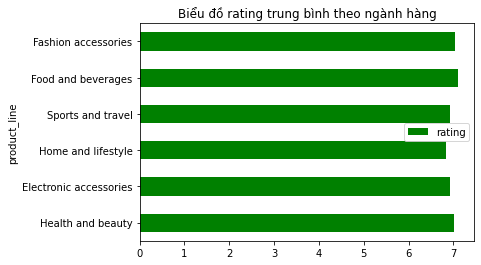

In [ ]:
df2 = []
for x in product_line_list:
  q14 = "SELECT AVG(rating) FROM data_frame WHERE product_line = '" + x +"';"
  df2.append(sqldf(q14).values.tolist())

df2 = numpy.ravel(df2)
df2 = pandas.DataFrame(df2, columns = ['rating'])
df2['product_line'] = product_line_listed
print(df2)
df2.plot.barh(x='product_line', y='rating',
             title='Biểu đồ rating trung bình theo ngành hàng', color='green')



Rating trung bình giữa các ngành hàng khá đồng đều, không có sự chênh lệch đáng kể, Food and beverages được đánh giá cao nhất và Home and lifestyle được đánh giá thấp nhất

   Health and beauty  Electronic accessories  Home and lifestyle  \
0           780.1510                896.7280            975.9400   
1           695.3455                826.8050            592.1135   
2           867.0625                863.9685            996.7995   

   Sports and travel  Food and beverages  Fashion accessories Month  
0          1031.7630             931.930             921.1960    T1  
1           657.6005             952.398             905.2315    T2  
2           935.5330             789.236             759.5675    T3  


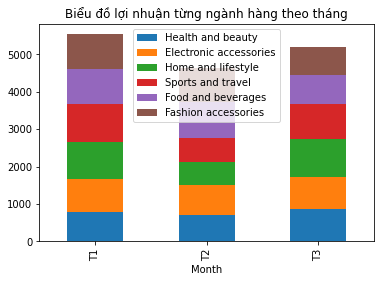

In [ ]:
from matplotlib.cbook import Stack
data_frame['date'] = pandas.to_datetime(data_frame['date']).dt.date
df1 = []
month = ['2019-01-', '2019-02-', '2019-03-']
for x in month:
  for y in product_line_list:
    q13 = "SELECT SUM(profit) FROM data_frame WHERE product_line = '" + y + "' AND date LIKE '" + x + "%';"
    df1.append(sqldf(q13).values.tolist())
df1 = numpy.ravel(df1)
df1 = numpy.reshape(df1, (len(month), product_line_list.size))
df1 = pandas.DataFrame(df1, columns = product_line_listed)
Month = ['T1', 'T2', 'T3']
df1['Month'] = Month
print(df1)
df1.plot(x = 'Month', kind = 'bar', stacked = True, title='Biểu đồ lợi nhuận từng ngành hàng theo tháng')

=> Lợi nhuận tháng 2 sụt giảm rõ rệt, chủ yếu do sự sụt giảm lợi nhuận đáng kể ở 2 ngành hàng:

1. Sports and travel
2. Home and lifestyle

A
2019-01-
   AVG(rating)
0     7.166667
A
2019-02-
   AVG(rating)
0     7.371429
A
2019-03-
   AVG(rating)
0     7.285714
C
2019-01-
   AVG(rating)
0          7.0
C
2019-02-
   AVG(rating)
0         7.35
C
2019-03-
   AVG(rating)
0     6.816667
B
2019-01-
   AVG(rating)
0     6.169565
B
2019-02-
   AVG(rating)
0     6.836842
B
2019-03-
   AVG(rating)
0         6.59
         T1        T2        T3 brand
0  309.9975  225.8275  386.6845     A
1  399.4760  168.4485  182.6435     C
2  322.2895  263.3245  366.2050     B


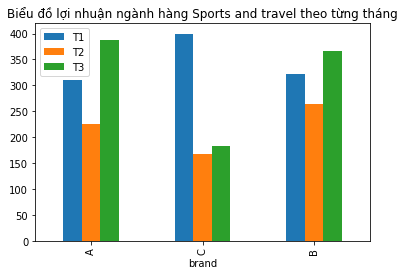

In [ ]:
# phân tích doanh thu ngành hàng Sports and travel
df3 = []
for x in brand_list:
  for y in month:
    q15 = "SELECT SUM(profit) FROM data_frame WHERE product_line = 'Sports and travel' AND brand ='" + x + "' AND date LIKE '" + y +"%';"
    q16 = "SELECT AVG(rating) FROM data_frame WHERE product_line = 'Sports and travel' AND brand ='" + x + "' AND date LIKE '" + y +"%';"
    print(x)
    print(y)
    print(sqldf(q16))
    df3.append(sqldf(q15).values.tolist())
df3 = numpy.ravel(df3)
df3 = df3.reshape(len(brand_list),len(month))
df3 = pandas.DataFrame(df3, columns = ['T1', 'T2', 'T3'])
df3['brand'] = brand_list
print(df3)

df3.plot(x = 'brand', kind = 'bar', stacked = False, title='Biểu đồ lợi nhuận ngành hàng Sports and travel theo từng tháng')

Lợi nhuận tại brand A, B, C T2 giảm mạnh so với T1

Lợi nhuận tại brand A, B ổn định trở lại và có chiều hướng tăng vào T3, tuy nhiên lợi nhuận tại brand C tăng trưởng chậm và chưa ổn định

=>	Doanh thu nghành hàng T2 giảm do lợi nhuận tại cả A, B, C đều giảm (C giảm mạnh nhất và tốc độ phục hồi chậm)

rating trung bình ngành hàng T2 không giảm => giảm lợi nhuận không phải do chất lượng sản phẩm/ dịch vụ


A
2019-01-
   AVG(rating)
0     7.166667
A
2019-02-
   AVG(rating)
0     7.371429
A
2019-03-
   AVG(rating)
0     7.285714
C
2019-01-
   AVG(rating)
0          7.0
C
2019-02-
   AVG(rating)
0         7.35
C
2019-03-
   AVG(rating)
0     6.816667
B
2019-01-
   AVG(rating)
0     6.169565
B
2019-02-
   AVG(rating)
0     6.836842
B
2019-03-
   AVG(rating)
0         6.59
[491.1235 227.2205 349.1415 266.4145 142.9955 252.283  218.402  221.8975
 395.375 ]
         T1        T2        T3 brand
0  491.1235  227.2205  349.1415     A
1  266.4145  142.9955  252.2830     C
2  218.4020  221.8975  395.3750     B


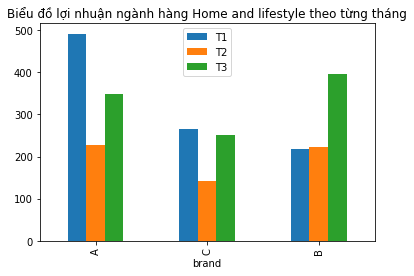

In [95]:
# phân tích doanh thu ngành hàng Home and lifestyle
df4 = []
for x in brand_list:
  for y in month:
    q18 = "SELECT SUM(profit) FROM data_frame WHERE product_line = 'Home and lifestyle' AND brand ='" + x + "' AND date LIKE '" + y +"%';"
    q19 = "SELECT AVG(rating) FROM data_frame WHERE product_line = 'Sports and travel' AND brand ='" + x + "' AND date LIKE '" + y +"%';"
    print(x)
    print(y)
    print(sqldf(q19))
    df4.append(sqldf(q18).values.tolist())

df4 = numpy.ravel(df4)
print(df4)
df4 = df4.reshape(len(brand_list),len(month))
df4 = pandas.DataFrame(df4, columns = ['T1', 'T2', 'T3'])
df4['brand'] = brand_list
print(df4)
df4.plot(x = 'brand', kind = 'bar', stacked = False, title='Biểu đồ lợi nhuận ngành hàng Home and lifestyle theo từng tháng')

Lợi nhuận tại brand A T2 giảm mạnh, T3 tăng tuy nhiên vẫn chưa bằng T1

Lợi nhuận tại B T1, 2 ổn định, T3 tăng mạnh

Lợi nhuận tại C T2 giảm tuy nhiên T3 đã ổn định
=>	Lợi nhuận ngành hàng T2 giảm do lợi nhuận tại A, C giảm (A giảm mạnh)

rating trung bình ngành hàng T2 không giảm => giảm lợi nhuận không phải do chất lượng sản phẩm/ dịch vụ
